/Users/takashi/.pyenv/versions/anaconda3-4.3.1/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


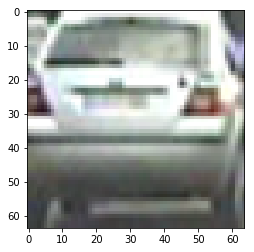

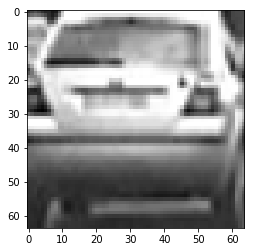

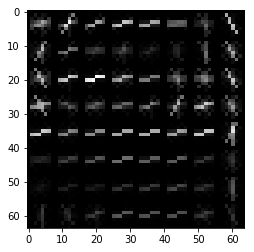

In [19]:
 %matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
import cv2

img = mpimg.imread("../vehicles/GTI_Far/image0929.png")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = hog(gray, orientations=orient, 
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)


plt.imshow(img)
plt.show()
plt.imshow(gray, cmap="gray")
plt.show()
plt.imshow(hog_image, cmap="gray")
plt.show()
# fig = plt.figure()
# plt.subplot(121)
# plt.imshow(img, cmap='gray')
# plt.title('Example Car Image')
# plt.subplot(122)
# plt.imshow(hog_image, cmap='gray')
# plt.title('HOG Visualization')


In [24]:
import sklearn.utils
from sklearn.model_selection import train_test_split
import glob

vehicles_files = []
non_vehicles_files = []
for f in glob.glob("../vehicles/KITTI_extracted/*.png"):
    vehicles_files.append(f)
    
for f in glob.glob("../non-vehicles/Extras/*.png"):
    non_vehicles_files.append(f)

print(len(vehicles_files))
print(len(non_vehicles_files))


train_vehicles, validation_vehicles = train_test_split(vehicles_files, test_size=0.2, random_state=0)
train_non_vehicles, validation_non_vehicles = train_test_split(non_vehicles_files, test_size=0.2, random_state=0)

print(len(train_vehicles), len(validation_vehicles))
print(len(train_non_vehicles), len(validation_non_vehicles))

#hogに変換

from sklearn import svm
clf = svm.SVC()
clf.fit(train_features, train_labels)


5966
5068
4772 1194
4054 1014
